In [1]:
import pandas as pd 
from ltp import LTP
import re
import numpy as np

In [2]:
df = pd.read_csv('items.csv', encoding='gbk')

In [5]:
df.head(50)

,ID,CREATIONTIME,PRODUCTS_ID,PRODUCTCOLOR,PRODUCTSIZE,SCORE,CONTENT
0,9807,2021/3/28 20:11,15472620626,绿色,128GB,1,没用半个月屏幕出现暗快
1,9808,2021/3/28 20:01,15472587868,紫色,256GB,1,啥子配件都没有
2,9809,2021/3/29 10:57,15474406846,紫色,128GB,1,没想象中那么好
3,9810,2021/3/26 17:26,15464796549,紫色,256GB,1,第一个电话就发现听筒是坏的。
4,9811,2021/3/30 20:49,15480543630,白色,128GB,1,三天屏幕就坏了?还好换了新的
5,9812,2021/3/24 23:53,15458734544,绿色,128GB,1,辣鸡苹果?，还是买华为和小米好
6,9813,2021/3/26 13:35,15463959648,黑色,128GB,1,其他特色：充电器头没有耳机没有要求另买
7,9814,2021/3/29 13:38,15475029706,紫色,128GB,1,标配内容表述不清，给购买造成误导
8,9815,2021/3/27 11:33,15467176884,绿色,128GB,1,不是新机，包装也不对，不是原装机的包装
9,9816,2021/3/20 20:04,15443026156,白色,128GB,1,玩个消消乐都能卡成这样？


In [6]:
for i in df.iterrows():
    print(i[1]['ID'])
    break

9807


In [7]:
content_frame = df['CONTENT']

In [8]:
# 第一个用于记录带有直接观点评论的数据
datahub1 = []
# 第二个用于记录不直接带有的数据
datahub2 = []
# 第一个用于记录带有观点评论的数据
datahub3 = []
def data_generate(data):
    '''
    data->list：一个个的列表
    '''
    if '?' not in data and '？' not in data:
        data = re.sub(' ', '，',data)
        data = re.sub(r'\n','',data)
        data = re.sub('&.*?;','',data)
        if '：' in data:
            new_data = re.split('：',data)
            datahub1.append([new_data[0],new_data[1:]])
        elif ('，'  or '。' or ' ' or '！') in data:
            new_data = re.split('，|。| |！]', data)
            for i in new_data:
                if len(i) > 0:
                    datahub2.append(i)
        else:
            datahub3.append(data)

In [17]:
for i in content_frame:
    data_generate(i)

In [18]:
len(content_frame)

4578

In [19]:
len(datahub1)

838

In [20]:
datahub2

['标配内容表述不清',
 '给购买造成误导',
 '不是新机',
 '包装也不对',
 '不是原装机的包装',
 '没有ix好用',
 '是真的',
 '还不如用ix',
 '手机比较卡',
 '下方有瞌痕',
 '差一天',
 '掉价了',
 '而且不能价格保护',
 '手机有点卡',
 '有点对不起这个价',
 '满格电一下午都不能勉强',
 '醉了',
 '打电话从耳边拿开',
 '一直黑屏',
 '一颗星是给快递小哥的',
 '一点不保价',
 '有需求的在等等',
 '买了马上降价500',
 '好气',
 '面部识别功能好差',
 '不行啊',
 '容易发烫充电慢',
 '刚买完就降价',
 '我也是服了',
 '还不支持价保',
 '才买几天',
 '立马降价500',
 '心碎了好吧',
 '不多说了',
 '看不到电子发票',
 '联系不上客服！！！',
 '左上角屏幕最上边点不了',
 '醉了醉了',
 '说好的返30000京东豆',
 '结果没返还',
 '手机暂时没有试',
 '拆了封条还不能退',
 '品控没做好',
 '摄像头上有灰！',
 '26号',
 '买完就降价',
 '直接赔300块',
 '买了几天才',
 '就又降价',
 '真是服了',
 '半个月前买的',
 '多花了2百',
 '机子发烫厉害',
 '没用过的',
 '最好不要买',
 '发热厉害',
 '死机',
 '手机使用时突然黑屏',
 '得过好一会才能好',
 '非常影响生活',
 '质量不好',
 '电池不耐用',
 '服务态度差',
 '不行不行',
 '实在是没得意思',
 '不要再他家买',
 '怎么总卡',
 '到手不到一个月',
 '卡了n次',
 '刚买两天活动优惠差价100',
 '什么鬼啊',
 '请问刚买完就降价',
 '是几个意思',
 '客服不行啊',
 '京东保价就是个笑话',
 '不好',
 '价格浮动大',
 '亲们谨慎购买',
 '买完就降价',
 '问客户双12降不降价也不回',
 '质量差',
 '闪退',
 '死机',
 '买了就后悔',
 '才买两天降价几百',
 '笑到哭了',
 '千万别买',
 '买了十天不到就出现问题了',
 '恶心',
 '下单半个月',
 '不催还不发货',
 '手机经常没信号',
 '客服

In [21]:
datahub3

['没用半个月屏幕出现暗快',
 '啥子配件都没有',
 '没想象中那么好',
 '第一个电话就发现听筒是坏的。',
 '第二天王者荣耀就闪退了',
 '好不好大家自己看图',
 '买了没几天就降价了',
 '预购的等了半个月',
 '不是特别理想',
 '才到第一天出现异响',
 '耳机接口有问题',
 '刚买就会黑屏死机真的是一般',
 '掉漆',
 '摄像头里面有灰尘',
 '双十一还没过就降价三百',
 '打王者居然不停卡',
 '手机偶尔有点烫手',
 '我真是没话说了就这样吧',
 '感觉手机像是翻新机今天买的怎么显示之前充过电',
 '不昨的',
 '手机用的一直想退货的',
 '我是中奖了吗充电频繁断电',
 '我只想说差级了',
 '售后直接不理人',
 '不是原装正版。自己想吧。',
 '没有充电器和耳机！服了',
 '质量不怎么好',
 '就是激活退不了。',
 '不送壳膜真的菜',
 '用了五天屏幕就坏了',
 '第二天我的面部就录不上了',
 '没有原装的包装',
 '不带充电器头我裂开',
 '手机烫的厉害',
 '最近两天老是自动关机',
 '不爽的一次购物抠门到不行膜都没有一张',
 '商品虚假不宜购买',
 '假的！苹果手机不能双卡双待！',
 '包装是真的差一点保护都没有的',
 '不得',
 '买了10天降价300。之前要换货也是各种搪塞！',
 '这**买了13天降了400块钱。',
 '怎么爱思无法识别',
 '没有充电头和耳机',
 '手机磕伤了退换不了',
 '我的发票怎么没有开',
 '用了几天出现死机',
 '我是满心的希望被砸的稀碎',
 '刚买几天就死机了',
 '没有针',
 '电饭煲！烫死！',
 '新手机竟然会黑屏也是醉了',
 '比实体店贵几百',
 '卡机、黑屏经常出现',
 '这个手机发热',
 '信号极差！',
 '摄像头区域经常发热',
 '开机发现摄像头有黑点',
 '屏幕有裂纹',
 '发烫',
 '感觉不是那么好',
 '充电头都不配一个',
 '手机玩着好烫不怎么好',
 '这才买多久就降这么多',
 '手机屏幕有时候点不了',
 '女朋友用着不开心骂骂咧咧',
 '屏幕亮度固定不了。手机发烫。手机时间管不了一天',
 '自带的充电器无法充电',
 '没有礼貌',
 '蓝牙连接不稳定',


In [34]:
ltp = LTP()

In [22]:
# seg1, hidden1 = ltp.seg(['摄像头里面'])
# seg2, hidden2 = ltp.seg(['摄像头外面有灰'])

In [23]:
# def cos_sim(vector_a, vector_b):
#     """
#     计算两个向量之间的余弦相似度
#     :param vector_a: 向量 a 
#     :param vector_b: 向量 b
#     :return: sim
#     """
#     vector_a = np.mat(vector_a)
#     vector_b = np.mat(vector_b)
#     num = float(vector_a * vector_b.T)
#     denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
#     sim = num / denom
#     return sim


In [24]:
# seg1

In [25]:
# seg2

In [26]:
# a = np.squeeze(hidden1['word_input'])
# b = np.squeeze(hidden2['word_input'])

In [27]:
# cos_sim(a[0], b[0])

In [28]:
# np.array(a[0])

In [29]:
def get_dataframe(sentences):
    all_dic = {}
    #分词
    sents = ltp.sent_split([sentences])
    index = 0
    for sentence in sents:
        dic = {}
        end_list = []
        link_list = []
        end_index = []
        end_gra = []
        begin_index = []
        seg, hidden = ltp.seg([sentence])
        #词性标注
        if len(seg[0]) > 1: 
            pos = ltp.pos(hidden)[0]
            #依存句法分析 
            dep = ltp.dep(hidden)[0]
    #         print(dep)
            for i in dep:
                begin,end,link = i
                begin_index.append(begin-1)
                end_index.append(end-1)
                link_list.append(link)
                if end == 0:
                    end_list.append('root')
                else:
                    end_list.append(seg[0][end-1])
            dic['begin_index'] = begin_index
            dic['item'] = seg[0]
            dic['gra'] = pos
            dic['link'] = link_list
            dic['end'] = end_list
            dic['end_index'] = end_index
            dic['end_gra'] = [pos[i] for i in end_index]
            dic['hidden'] = np.squeeze(hidden['word_input'])
            all_dic[index] = dic
            index += 1
    return all_dic


def parse_srl(sentences):
    all_dic = {}
    sents = ltp.sent_split([sentences])
    index = 0
    for sentence in sents:
        seg, hidden = ltp.seg([sentence])
        srl = ltp.srl(hidden, keep_empty = False)[0]
        information = {}
        for i in srl:
            dic = {}
            index, items = i
            for label, begin, end in items:
                dic[label] = ''.join(seg[0][begin:end+1])
            information[seg[0][index]] = dic
        all_dic[index] = information
        index += 1
    return all_dic


In [30]:
# def parse_df(df,sentence):
#     temp = []
#     if not df[df['link'] == 'SBV'].empty:
#         new_df = df[df['link']=='SBV'][['item', 'end']]
#         for i in new_df.iterrows():
#             first = i[1]['item']
#             second = i[1]['end']
#             #若还存在动宾关系，提取出来 
#             if not df[(df['link'] == 'VOB') & (df['end']==second)]['item'].empty:
#                     #若存在对属性描述的形容词，提取出来                
#                 third = df[(df['link'] == 'VOB') & (df['end']==second) & (df['gra']!='v')]['item']
#                 if not third.empty:
#                     temp.append([first, second, third.values[0]])
#             elif not df[(df['link'] == 'VOB') & (df['end']==first)]['item'].empty:
#                 third = df[(df['link'] == 'VOB') & (df['end']==first) & (df['gra']!='v')]['item']
#                 if not third.empty:
#                     temp.append([first, third.values[0], second])
#             #若存在状语：
#             elif not df[(df['link'] == 'ADV') & (df['end']==second)]['item'].empty:
#                 third = df[(df['link'] == 'ADV') & (df['end']==second) & (df['gra']!='v')]['item']
#                 if not third.empty:
#                     temp.append([first, third.values[0], second])
#             else:
#                     temp.append([first, second])
#     elif not df[df['link']=='VOB'].empty:
#         new_df = df[df['link']=='VOB'][['item', 'end']]
#         for i in new_df.iterrows():
#             first = i[1]['item']
#             second = i[1]['end']
#             temp.append([first,second])
# #     if not df[df['link'] == 'ATT'].empty:
# #         ATT = df[df['link'] == 'ATT']['item'].values[0]
# #         temp.append([ATT])
#     if len(temp) == 0:
#         print(parse_srl(sentence))
#     return temp

In [31]:
def parse_df(df,sentence):
    temp = {}
    hidden_dic = []
    if not df[(df['link'] == 'SBV')  ].empty:
        new_df = df[df['link']=='SBV'][['item', 'end']]
        for i in new_df.iterrows():
            first = i[1]['item']
            second = i[1]['end']
            first_index = df[df['item'] == first]['begin_index'].values[0]
            #基于n v a的SBV+VOB n对应属性， n-v-a a为对应的形容词
            if not df[(df['link'] == 'VOB') & (df['end']==second) &(df['gra'] == 'a')]['item'].empty:
                a = df[(df['link'] == 'VOB') & (df['end']==second) &(df['gra'] == 'a')]['item'].values[0]
#                 if not df[(df['link'] == 'ATT') & (df['end']==first) ]['item'].empty:
#                     att = df[(df['link'] == 'ATT') & (df['end']==first) ]['item'].values[0]
#                     temp['att-nva'] = [att+first,second,a]
#                 else:
                temp['nva'] = [first,second,a]
            elif not df[(df['link'] == 'VOB') & (df['end']==second) &(df['gra'] == 'n')]['item'].empty:
                n = df[(df['link'] == 'VOB') & (df['end']==second) &(df['gra'] == 'n')]['item'].values[0]
#                 if not df[(df['link'] == 'ATT') & (df['end']==first) ]['item'].empty:
#                     att = df[(df['link'] == 'ATT') & (df['end']==first) ]['item'].values[0]
#                     temp['att-nvn'] = [att+first,second,n]
#                 else: 
                temp['nvn'] = [first,second,n]
            #基于n d v的SBV+ADV n对应属性,    n-d-v      
            elif not df[(df['link'] == 'ADV') & (df['end']==second) &(df['gra'] == 'd')]['item'].empty:
                d = df[(df['link'] == 'ADV') & (df['end']==second) &(df['gra'] == 'd')]['item'].values[0]
                temp['ndv'] = [first,d,second]
            #基于n i a的SBV + ADV,n-a i
            elif not df[(df['link'] == 'ADV') & (df['end']==second) &(df['gra'] == 'i')]['item'].empty:
                i = df[(df['link'] == 'ADV') & (df['end']==second) &(df['gra'] == 'i')]['item'].values[0]
                temp['nia'] = [first,i,second]
            else:
                temp['nv'] = [first, second]
                
            hidden_dic.append([first,np.array(df['hidden'][first_index])]) 
#     if len(temp) == 0:
#         srl = parse_srl(sentence)
# #         print(srl)
#         for i in srl:
#             for j in srl[i]:
# #                 print(srl[i][j])
#                 if 'A0' in srl[i][j]:
#                     temp['A0'] = srl[i][j]['A0']
#                 elif 'A1' in srl[i][j]:
#                     temp['A1'] = srl[i][j]['A1'] 
    return temp,hidden_dic

In [36]:
def parse_sentence(sentences):   
    dic = get_dataframe(sentences)
    sents = ltp.sent_split([sentences])
    for i in dic:
        attribute = {} 
        df = pd.DataFrame(dic[i])
#         print(df)
        temp,hidden_dic = parse_df(df, sents[i])
        print(temp)
#         values.append(hidden_dic)
#         print(hidden_dic)
        index = 0
        for i in temp:
            attribute['hidden'] = hidden_dic[index]
            attribute['target'] = temp[i][-1]
            if temp[i][0] in repeat_list:
                repeat_list[temp[i][0]] += 1
            else:
                repeat_list[temp[i][0]] = 1
            bag[temp[i][0]+str(repeat_list[temp[i][0]])] = attribute
            index += 1
            
#         for i in temp:
# #             if temp[i][0] in bag:
# #                 bag[temp[i][0]] += 1
# #             else:
# #                 bag[temp[i][0]] = 1

#             bag[temp[i][0]] = 
#             if temp[i][0] not in bag:
#                 bag[temp[i][0]] = [temp[i][-1]]
#             else:
#                 bag[temp[i][0]].append(temp[i][-1])
#             for j in temp[i]:
#                 if j in bag:
#                     bag[j] += 1
#                 else:
#                     bag[j] = 1
                

In [ ]:
# extraction = {}
# dic, information = parse_sentence(content_frame[2])
# df = pd.DataFrame(dic)
# extraction[(df[df['link']=='SBV']['item'].values[0])] = 1
bag = {}
repeat_list = {}
for i in datahub3[:100]:
    parse_sentence(i)

{'nva': ['屏幕', '出现', '暗快']}
{'ndv': ['配件', '都', '没有']}
{}
{'ndv': ['电话', '就', '发现'], 'nva': ['听筒', '是', '坏']}
{'ndv': ['荣耀', '就', '闪退']}
{}
{}
{'nv': ['预购', '等']}
{}
{}
{'nvn': ['接口', '有', '问题']}
{}
{}
{'nvn': ['里面', '有', '灰尘']}
{'ndv': ['双十一', '就', '降价']}
{'nvn': ['打', '停', '卡']}
{'ndv': ['手机', '偶尔', '烫手']}
{'nvn': ['我', '没', '话']}
{'nvn': ['手机', '是', '翻新机']}
{}
{'nv': ['手机', '用'], 'ndv': ['用', '一直', '想']}
{'nv': ['我', '是']}
{'ndv': ['我', '只', '想']}
{}
{}
{'nv': ['自己', '想']}
{}
{}
{'nia': ['质量', '不怎么', '好']}
{'ndv': ['激活', '就是', '退']}
{}
{}
{}
{}
{'nv': ['我', '裂开']}
{'nv': ['手机', '烫']}
{}
{'nv': ['购物', '抠门']}
{'nv': ['商品', '虚假']}
{}
{'nv': ['手机', '卡']}
{'ndv': ['保护', '都', '没有']}
{}
{'ndv': ['换', '也', '是']}
{'nv': ['这', '买']}
{}
{}
{'nv': ['手机', '磕']}
{}
{}
{'nvn': ['我', '是', '希望']}
{}
{}
{}
{}
{'nvn': ['手机', '会', '黑屏']}
{}
{'ndv': ['卡机', '经常', '出现']}
{'nv': ['手机', '发热']}
{'ndv': ['信号', '极', '差']}
{'ndv': ['区域', '经常', '发热']}
{'nvn': ['摄像头', '有', '点']}
{'nvn': ['屏幕', '有', '裂纹']}
{}
{'nv

In [ ]:
datahub3[:20]

In [48]:
a,b = ltp.seg(['耳机接口有问题'])
a

[['耳机', '接口', '有', '问题']]

In [46]:
# for i in bag:
#     print(bag[i])
#     break

In [17]:
def bag_to_data(bag):
    name = []
    data = []
    target = []
    for i in bag:
        name.append(i)
        data.append(bag[i]['hidden'][1])
        target.append(bag[i]['target'])
    file_data = {'data':data,'name':name,'target':target}
#     file_name = pd.DataFrame(name,columns='name')
#     file_all= file_data.join(file_name, how='outer')
#     file_all.to_csv('all.csv')
    return file_data       
            

In [18]:
file_data = bag_to_data(bag)

In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)   #降到2维
pca.fit(np.array(file_data['data']))  

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
newX=pca.fit_transform(np.array(file_data['data']))

In [46]:
newX

array([[-1.8517616 ,  1.4932636 ],
       [-1.1243153 , -1.2028253 ],
       [-1.4950716 , -2.5048351 ],
       ...,
       [-1.6796708 , -1.1050025 ],
       [-2.130741  ,  1.1846658 ],
       [ 0.13683377, -1.6270914 ]], dtype=float32)

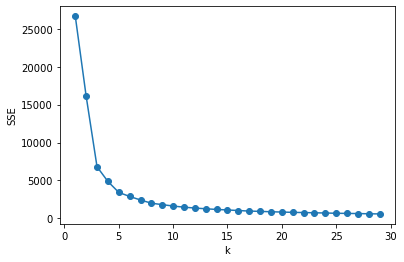

In [22]:
import matplotlib.pyplot as plt

SSE = []
for k in range(1,30):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(newX)
    SSE.append(estimator.inertia_) 
X = range(1,30)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

In [23]:
y_pred = KMeans(n_clusters=3).fit_predict(newX)

In [24]:
file_data['label'] = y_pred

In [25]:
a = pd.DataFrame(file_data)

In [26]:
a[['name','target','label']].to_csv('label.csv')

In [27]:
def generate_csv(dataframe, k):
    for i in range(k):
        dataframe[dataframe['label']==i][['name','target','label']].to_csv('label_{}.csv'.format(i))

In [28]:
generate_csv(a,3)